# Tidy3D mode solver

Tidy3D includes an open-source FDFD mode solver for simulating waveguide modes.

## Waveguides

Guided electromagnetic modes are those with an effective index larger than that of the waveguide cladding.

In the example below, we have a silicon waveguide (n = 3.4) surrounded by a SiO₂ cladding (n = 1.44). For a waveguide with dimensions of 220 nm in height and 450 nm in width, the effective index is calculated to be 2.466.

In [26]:
try:
    import gplugins.tidy3d as gt
except ImportError:
    raise ImportError("Please install pytools-litho-design with the tidy3d option")

import gdsfactory as gf
import matplotlib.pyplot as plt
import numpy as np
from gdsfactory.generic_tech import get_generic_pdk

gf.config.rich_output()
PDK = get_generic_pdk()
PDK.activate()

nm = 1e-3

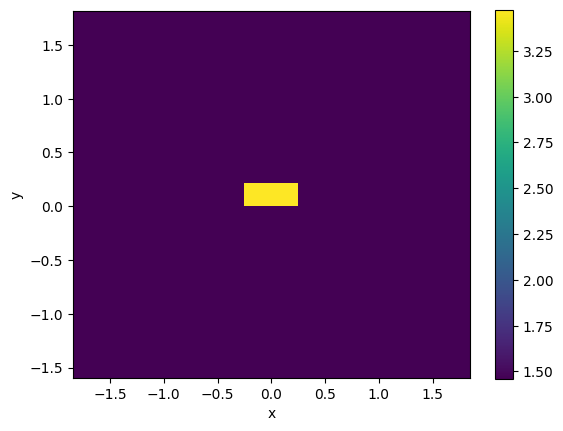

In [2]:
strip = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=0.5,
    core_thickness=0.22,
    slab_thickness=0.0,
    core_material="si",
    clad_material="sio2",
)
strip.plot_index()

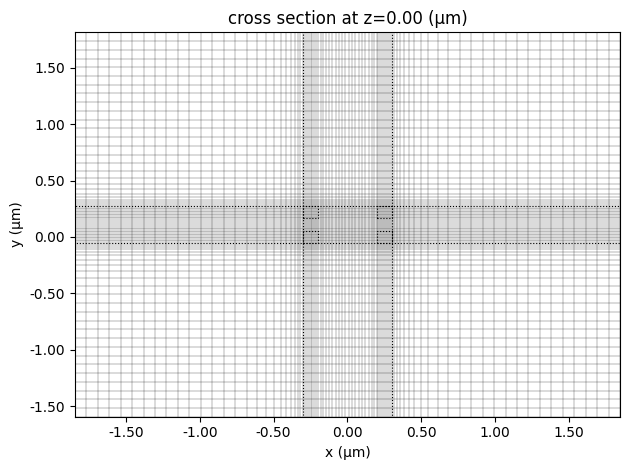

In [3]:
strip.plot_grid()

12:48:13 CET WARNING: The group index was not computed. To calculate group      
             index, pass 'group_index_step = True' in the 'ModeSpec'.           

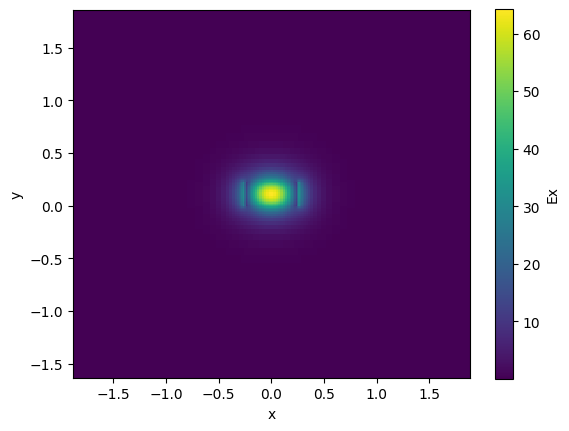

In [4]:
strip.plot_field(field_name="Ex", mode_index=0)  # TE

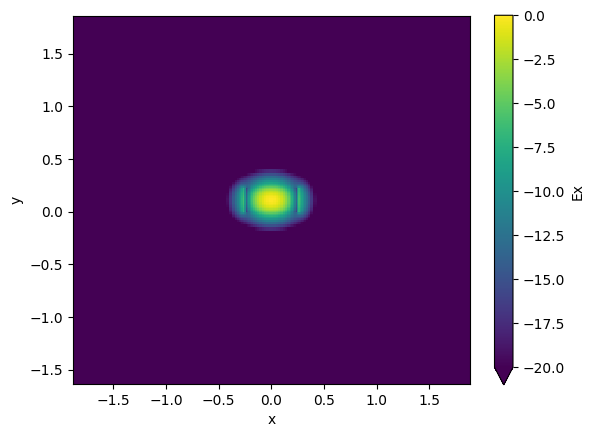

In [5]:
strip.plot_field(field_name="Ex", mode_index=0, value="dB")  # TE

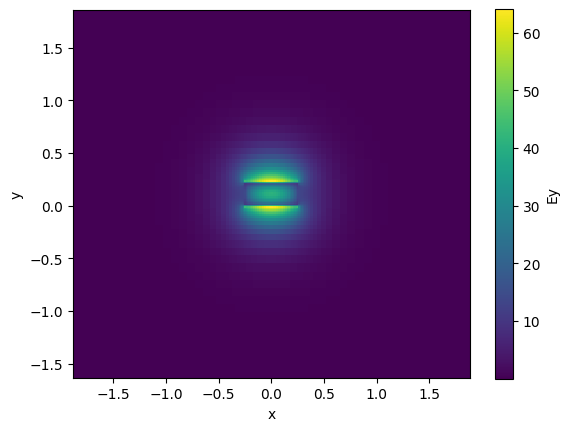

In [6]:
strip.plot_field(field_name="Ey", mode_index=1)  # TM

In [7]:
strip.n_eff

array([2.51134734+4.42777628e-05j, 1.86463643+2.09422901e-04j])

12:48:32 CET WARNING: Mode field at frequency index 0, mode index 1 does not    
             decay at the plane boundaries.                                     

array([2.67427418+3.10179975e-05j, 2.50854925+4.47861102e-05j])

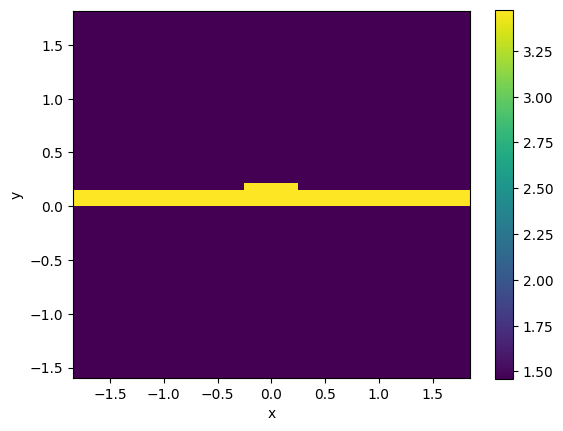

In [8]:
rib = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=0.5,
    core_thickness=0.22,
    slab_thickness=0.15,
    core_material="si",
    clad_material="sio2",
)
rib.plot_index()
rib.n_eff

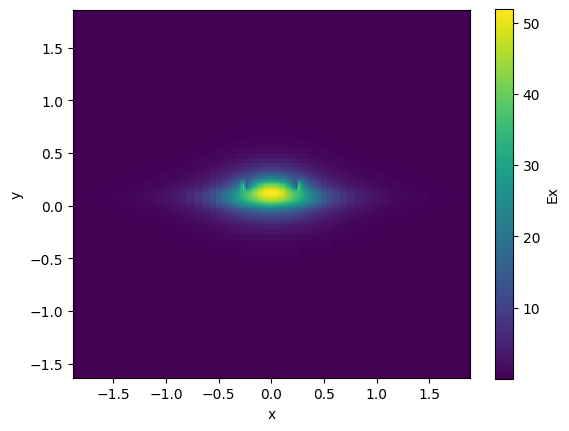

In [9]:
rib.plot_field(field_name="Ex", mode_index=0)  # TE

array([1.64461788+8.05914283e-05j, 1.57796343+1.42713312e-04j])

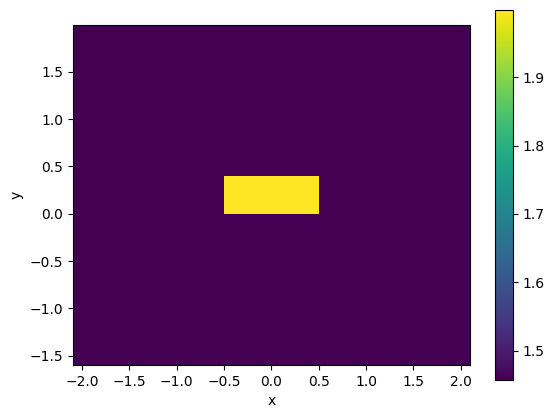

In [10]:
nitride = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=1.0,
    core_thickness=400 * nm,
    slab_thickness=0.0,
    core_material="sin",
    clad_material="sio2",
)
nitride.plot_index()
nitride.n_eff

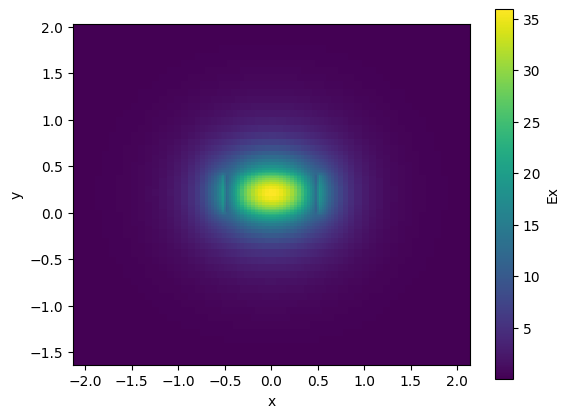

In [11]:
nitride.plot_field(field_name="Ex", mode_index=0)  # TE

## Sweep width

You can sweep the waveguide width and compute the modes.

By increasing the waveguide width, the waveguide supports many more TE and TM modes. Where TE modes have a dominant Ex field and TM modes have larger Ey fields.

Notice that waveguides wider than 0.450 um support more than one TE mode. Therefore the maximum width for single mode operation is 0.450 um.


  0%|          | 0/7 [00:00<?, ?it/s]

12:48:51 CET WARNING: Mode field at frequency index 0, mode index 3 does not    
             decay at the plane boundaries.                                     

12:48:56 CET WARNING: Mode field at frequency index 0, mode index 3 does not    
             decay at the plane boundaries.                                     

  0%|          | 0/7 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Effective index sweep')

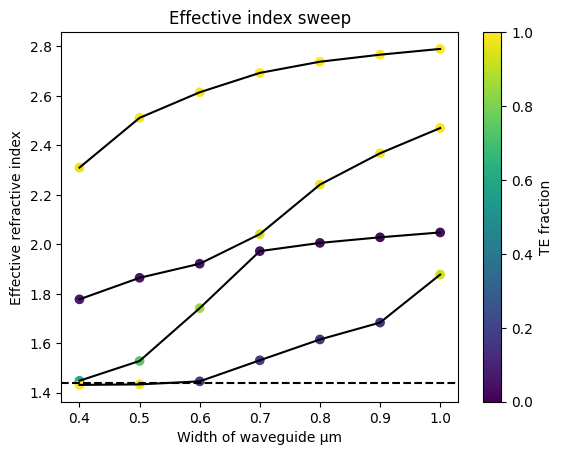

In [12]:
strip = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=1.0,
    slab_thickness=0.0,
    core_material="si",
    clad_material="sio2",
    core_thickness=220 * nm,
    num_modes=4,
)
w = np.linspace(400 * nm, 1000 * nm, 7)
n_eff = gt.modes.sweep_n_eff(strip, core_width=w)
fraction_te = gt.modes.sweep_fraction_te(strip, core_width=w)

for i in range(4):
    plt.plot(w, n_eff.sel(mode_index=i).real, c="k")
    plt.scatter(
        w, n_eff.sel(mode_index=i).real, c=fraction_te.sel(mode_index=i), vmin=0, vmax=1
    )
plt.axhline(y=1.44, color="k", ls="--")
plt.colorbar().set_label("TE fraction")
plt.xlabel("Width of waveguide µm")
plt.ylabel("Effective refractive index")
plt.title("Effective index sweep")

**Exercises**

- What is the maximum width to support a single TE mode at 1310 nm?
- For a Silicon Nitride (n=2) 400nm thick waveguide surrounded by SiO2 (n=1.44), what is the maximum width to support a single TE mode at 1550 nm?
- For two 500x220nm Silicon waveguides surrounded by SiO2, what is the coupling length (100% coupling) for 200 nm gap?


## Group index

You can also compute the group index for a waveguide.

In [13]:
nm = 1e-3

strip = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=500 * nm,
    slab_thickness=0.0,
    core_material="si",
    clad_material="sio2",
    core_thickness=220 * nm,
    num_modes=4,
    group_index_step=10 * nm,
)
print(strip.n_group)

12:49:39 CET WARNING: Mode field at frequency index 0, mode index 3 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 1, mode index 3 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 2, mode index 3 does not    
             decay at the plane boundaries.                                     

[4.17803969 4.08299706 2.71577378 1.50333028]


## Bend modes

You can compute bend modes specifying the bend radius.

12:49:48 CET WARNING: Mode field at frequency index 0, mode index 1 does not    
             decay at the plane boundaries.                                     

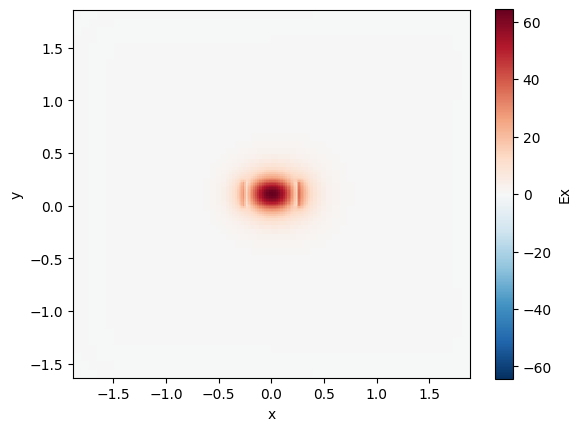

In [14]:
strip_bend = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=500 * nm,
    core_thickness=220 * nm,
    slab_thickness=0.0,
    bend_radius=4,
    core_material="si",
    clad_material="sio2",
)
strip_bend.plot_field(field_name="Ex", mode_index=0)  # TE

## Bend loss

You can also compute the losses coming from the mode mismatch from the bend into a straight waveguide.
To compute the bend loss due to mode mismatch you can calculate the mode overlap of the straight mode and the bent mode.
Because there are two mode mismatch interfaces the total loss due to mode mismatch will be squared (from bend to straight and from straight to bend).

![](https://i.imgur.com/M1Yysdr.png)

[from paper](https://ieeexplore.ieee.org/ielaam/50/8720127/8684870-aam.pdf)

  0%|          | 0/3 [00:00<?, ?it/s]

Text(0, 0.5, 'Mismatch (dB)')

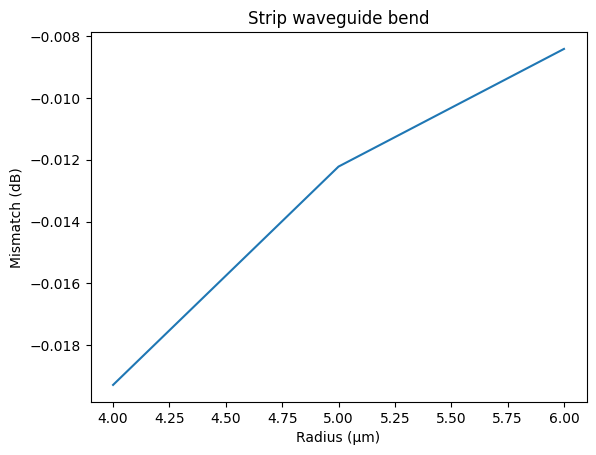

In [15]:
radii = np.arange(4, 7)
bend = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=500 * nm,
    core_thickness=220 * nm,
    core_material="si",
    clad_material="sio2",
    num_modes=1,
    bend_radius=radii.min(),
)
mismatch = gt.modes.sweep_bend_mismatch(bend, radii)

plt.plot(radii, 10 * np.log10(mismatch))
plt.title("Strip waveguide bend")
plt.xlabel("Radius (μm)")
plt.ylabel("Mismatch (dB)")

[0.00502655 0.00628319 0.00753982]


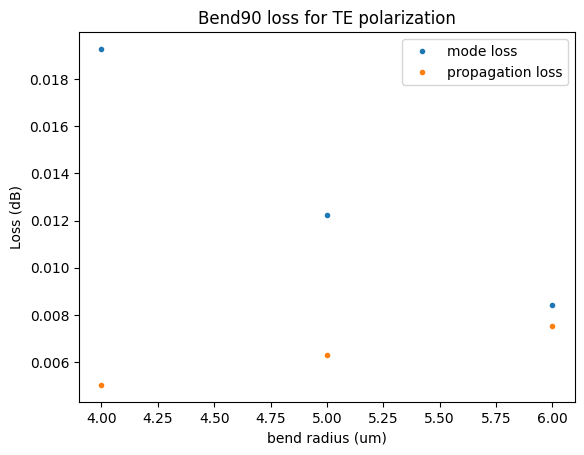

In [16]:
dB_cm = 2  # dB/cm
length = 2 * np.pi * radii * 1e-6
propagation_loss = dB_cm * length * 1e2
print(propagation_loss)

plt.title("Bend90 loss for TE polarization")
plt.plot(radii, -10 * np.log10(mismatch), ".", label="mode loss")
plt.plot(radii, propagation_loss, ".", label="propagation loss")
plt.xlabel("bend radius (um)")
plt.ylabel("Loss (dB)")
plt.legend()

12:50:17 CET WARNING: Mode field at frequency index 0, mode index 1 does not    
             decay at the plane boundaries.                                     

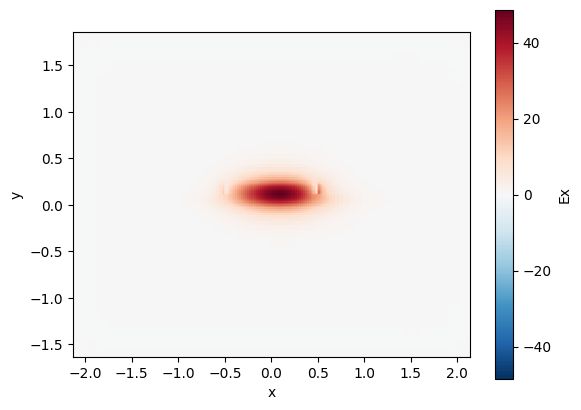

In [17]:
rib = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=1000 * nm,
    core_thickness=220 * nm,
    slab_thickness=110 * nm,
    bend_radius=15,
    core_material="si",
    clad_material="sio2",
)
rib.plot_field(field_name="Ex", mode_index=0)  # TE

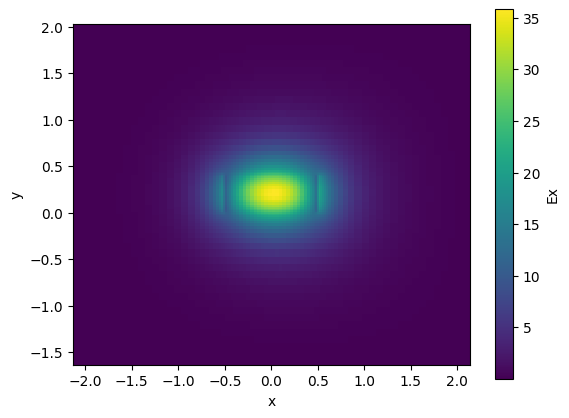

In [18]:
nitride_bend = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=1000 * nm,
    core_thickness=400 * nm,
    slab_thickness=0.0,
    bend_radius=30,
    core_material="sin",
    clad_material="sio2",
)
nitride_bend.plot_field(field_name="Ex", mode_index=0, value="abs")  # TE

In [19]:
radii = np.array([30, 35, 40])
bend = gt.modes.Waveguide(
    wavelength=1.55,
    core_width=1000 * nm,
    core_thickness=400 * nm,
    core_material="sin",
    clad_material="sio2",
    num_modes=1,
    bend_radius=radii.min(),
)
mismatch = gt.modes.sweep_bend_mismatch(bend, radii)

  0%|          | 0/3 [00:00<?, ?it/s]

[0.03769911 0.0439823  0.05026548]


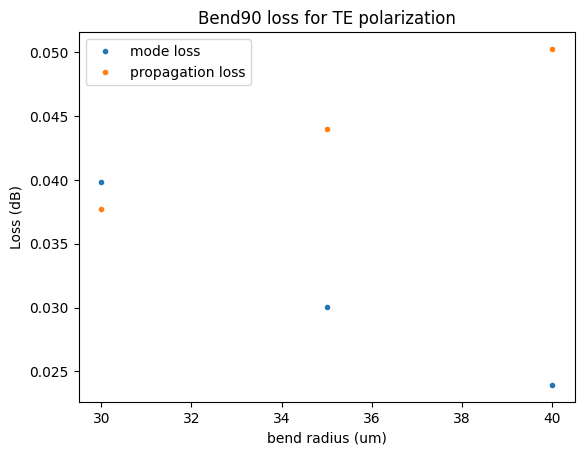

In [20]:
dB_cm = 2  # dB/cm
length = 2 * np.pi * radii * 1e-6
propagation_loss = dB_cm * length * 1e2
print(propagation_loss)

plt.title("Bend90 loss for TE polarization")
plt.plot(radii, -10 * np.log10(mismatch), ".", label="mode loss")
plt.plot(radii, propagation_loss, ".", label="propagation loss")
plt.xlabel("bend radius (um)")
plt.ylabel("Loss (dB)")
plt.legend()

**Exercises**

- For a 500nm wide 220nm thick Silicon waveguide surrounded by SiO2, what is the minimum bend radius to have less than 0.04dB loss for TE polarization at 1550nm?
- For a 500nm wide 220nm thick Silicon waveguide surrounded by SiO2, what is the minimum bend radius to have 99% power transmission for TM polarization at 1550nm?

## Waveguide coupler

You can also compute the modes of a waveguide coupler.

```
       ore_width[0]  core_width[1]
        <------->     <------->
         _______       _______   _
        |       |     |       | |
        |       |     |       |
        |       |_____|       | | core_thickness
        |slab_thickness       |
        |_____________________| |_
                <----->
                  gap


```

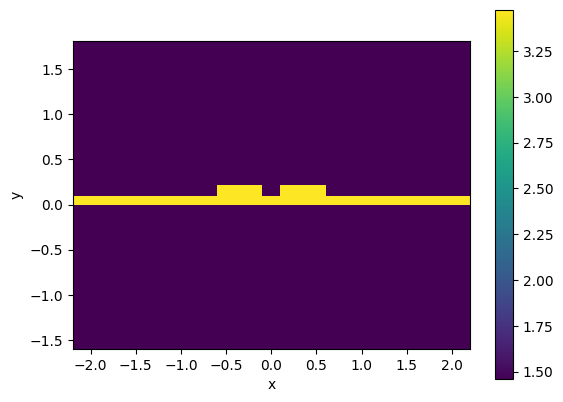

In [21]:
c = gt.modes.WaveguideCoupler(
    wavelength=1.55,
    core_width=(500 * nm, 500 * nm),
    gap=200 * nm,
    core_thickness=220 * nm,
    slab_thickness=100 * nm,
    core_material="si",
    clad_material="sio2",
)
c.plot_index()

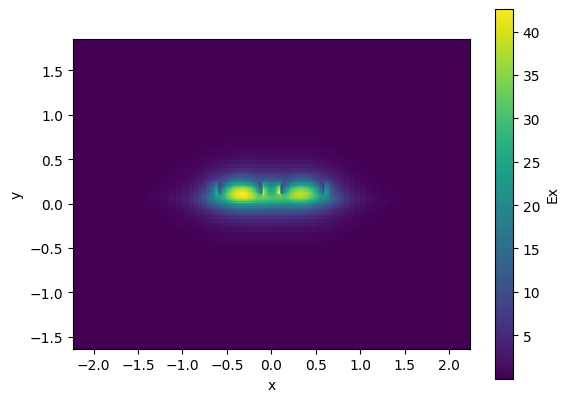

In [22]:
c.plot_field(field_name="Ex", mode_index=0)  # TE

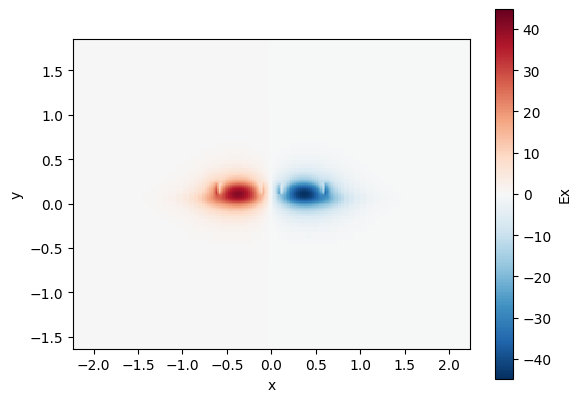

In [23]:
c.plot_field(field_name="Ex", mode_index=1)  # TE


Coupler: WaveguideCoupler(wavelength=array(1.55), core_width=['0.45', '0.45'], core_thickness='0.22', core_material='si', clad_material='sio2', box_material=None, slab_thickness='0.0', clad_thickness=None, box_thickness=None, side_margin=None, sidewall_angle='0.0', sidewall_thickness='0.0', sidewall_k='0.0', surface_thickness='0.0', surface_k='0.0', bend_radius=None, num_modes='4', group_index_step='False', precision='double', grid_resolution='20', max_grid_scaling='1.2', cache_path='/home/nynra/.gdsfactory/modes', overwrite='False', gap='0.1')
Effective indices: [2.4637647 +6.57552457e-05j 2.39007229+5.06214923e-05j
 1.9225165 +1.99036730e-04j 1.71420814+2.37015740e-04j]
Mode areas: [0.31003254 0.33258301 0.57286555 0.59002858]
Coupling length: [10.5166863   3.72044606]


  0%|          | 0/11 [00:00<?, ?it/s]

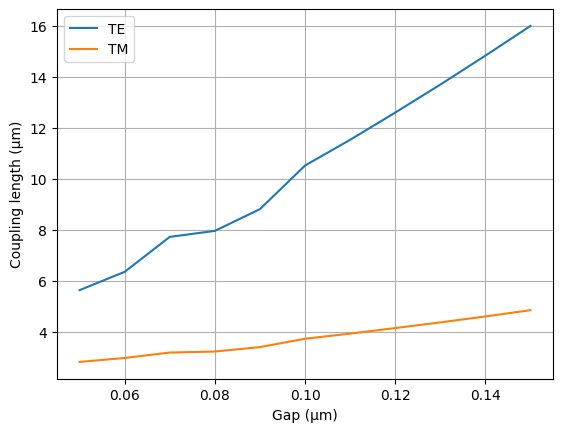

In [24]:
coupler = gt.modes.WaveguideCoupler(
    wavelength=1.55,
    core_width=(450 * nm, 450 * nm),
    core_thickness=220 * nm,
    core_material="si",
    clad_material="sio2",
    num_modes=4,
    gap=0.1,
)

print("\nCoupler:", coupler)
print("Effective indices:", coupler.n_eff)
print("Mode areas:", coupler.mode_area)
print("Coupling length:", coupler.coupling_length())

gaps = np.linspace(0.05, 0.15, 11)
lengths = gt.modes.sweep_coupling_length(coupler, gaps)

_, ax = plt.subplots(1, 1)
ax.plot(gaps, lengths)
ax.set(xlabel="Gap (μm)", ylabel="Coupling length (μm)")
ax.legend(["TE", "TM"])
ax.grid()